In [1]:
import os
import sys

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap


print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)
# importlib.reload(funcs.brain_mapping)
from funcs.brain_mapping import reg_to_nifti, vol_to_surf

rd = RegData
rl = Reloader

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


#### Here I check the peripheral results for the first time

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


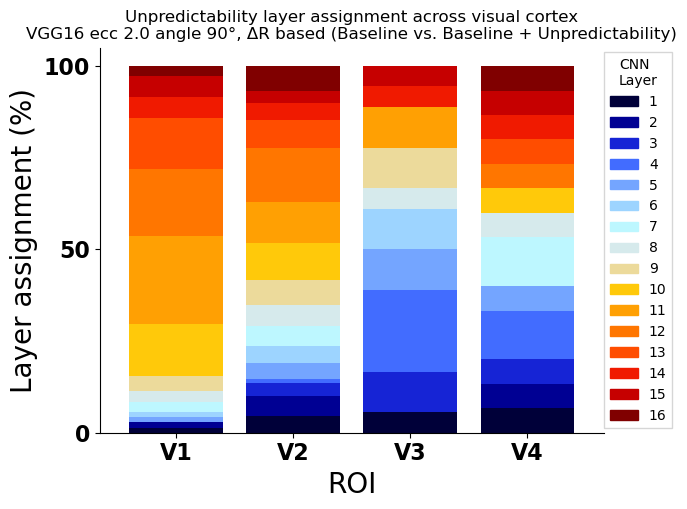

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


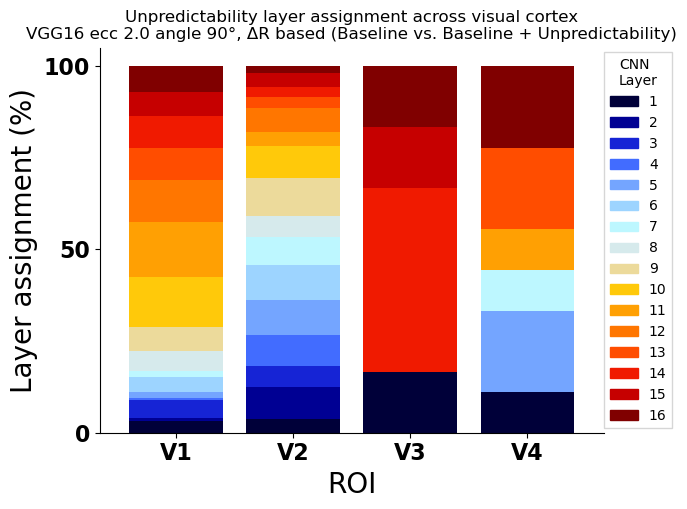

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


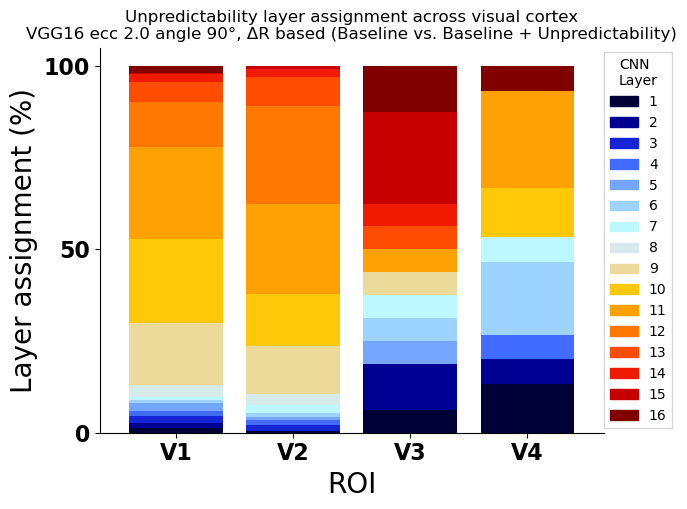

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


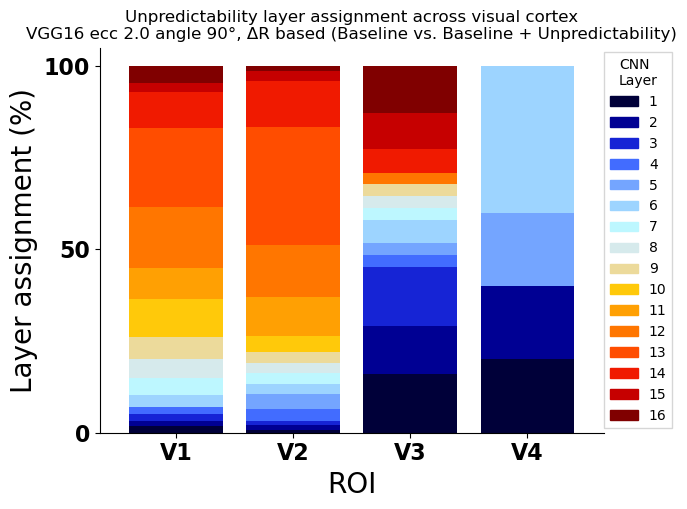

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


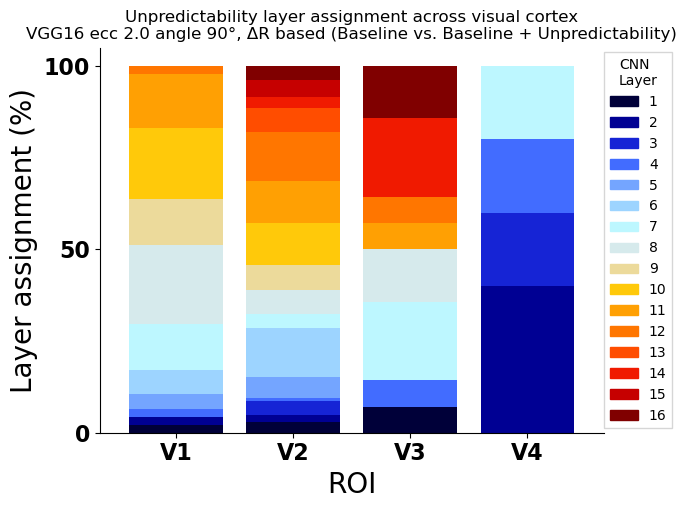

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


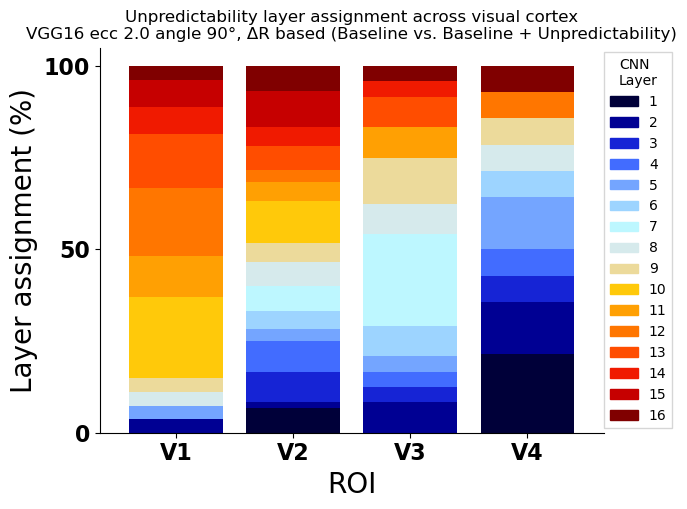

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


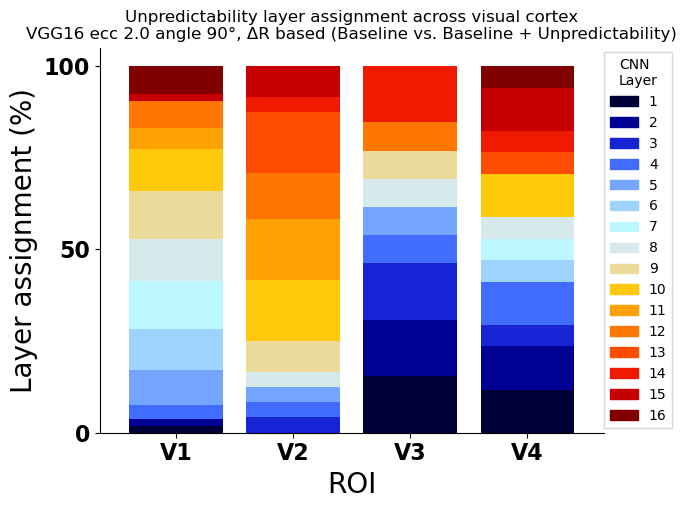

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.
Number of layers: 16


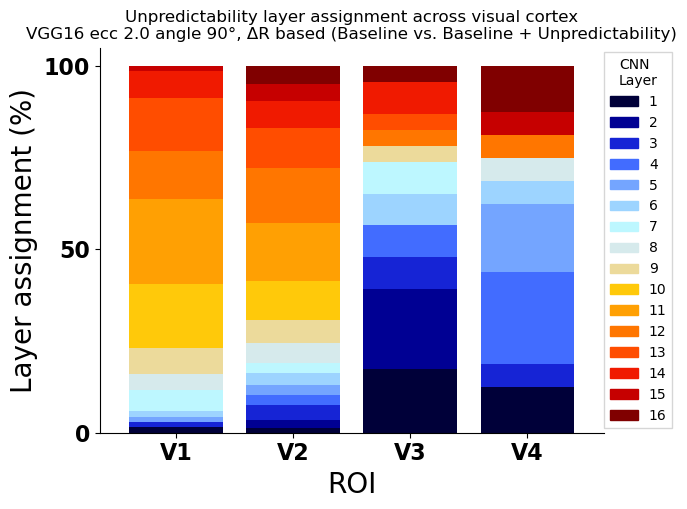

In [6]:
angle = 90
for subject in NSP.subjects:

    results = rd(subject = subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="R", skip_norm_lay = True)


    results.assign_layers(max_or_weighted = "weighted",
                        verbose = True,
                        title = f"Unpredictability layer assignment across visual cortex\nVGG16 ecc 2.0 angle {angle}°, ΔR based (Baseline vs. Baseline + Unpredictability)",
                        input_df = None,
                        figsize = (6.5 , 5))

    # results.mean_lines(fit_polynom=False,
    #                 polynom_order=1,
    #                 plot_catplot=True,
    #                 )
        
            
        # results = rd(subject = "subj01", folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", skip_norm_lay = True)
        # results.assign_layers("max")

DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFr

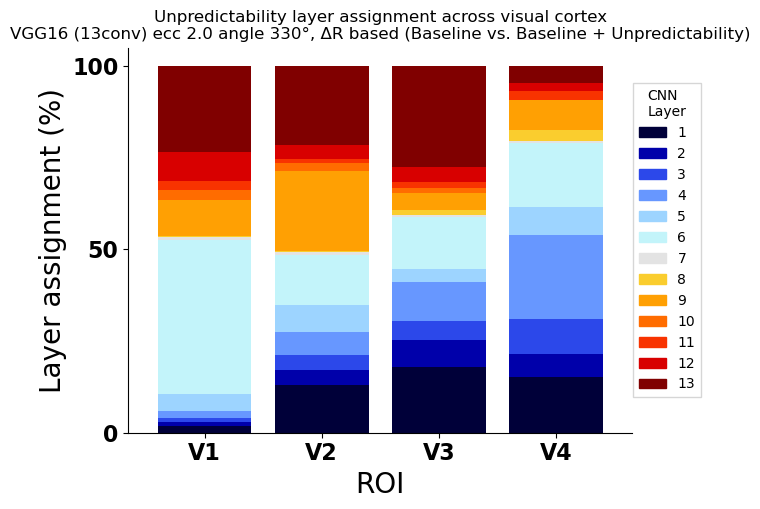

In [57]:
# Poging tot aggregeren van de 3 patches, eens even zien

angles = [90, 210, 330]
# angles = [330]

stacked_dfs = []

# subs = [subj for subj in NSP.subjects if subj != "subj02"]

for angle in angles:
    for subject in NSP.subjects:
    # for subject in subs:
    # for subject in ["subj01"]:
        results = rd(subject = subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", skip_norm_lay = True)

        # results._normalize_per_voxel()
        # results.assign_layers(
        #     max_or_weighted="max", 
        #     title=f"$\mathbf{{Subject\ {subject[-1]}}}$\nUnpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)"
        # )

        results._get_max_layer()
        stacked_dfs.append(results.df)
    
final_df = pd.concat(stacked_dfs)

final_df

results.assign_layers(max_or_weighted = "max",
                    verbose = True,
                    title = f"Unpredictability layer assignment across visual cortex\nVGG16 (13conv) ecc 2.0 angle {angle}°, ΔR based (Baseline vs. Baseline + Unpredictability)",
                    input_df = final_df,
                    figsize = (6.5 , 5))
    
        
    # results = rd(subject = "subj01", folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", skip_norm_lay = True)
    # results.assign_layers("max")

DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


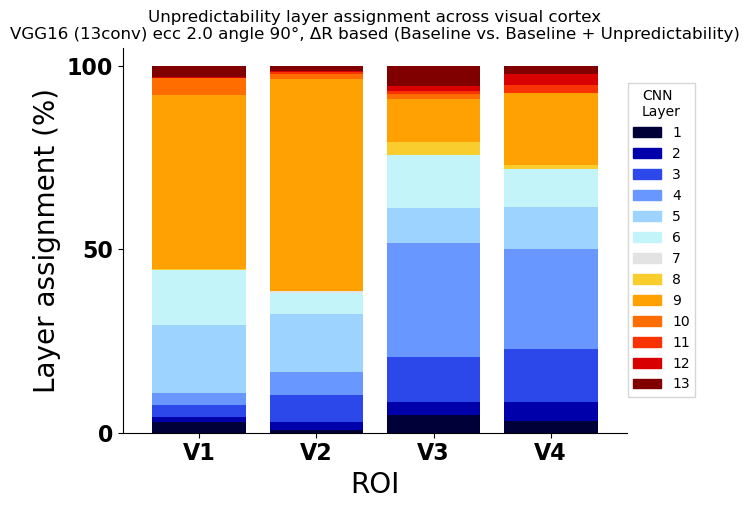

DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


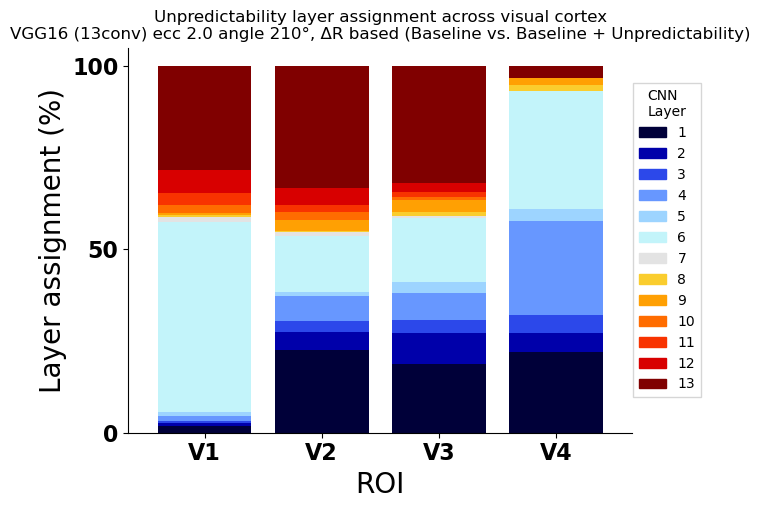

DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


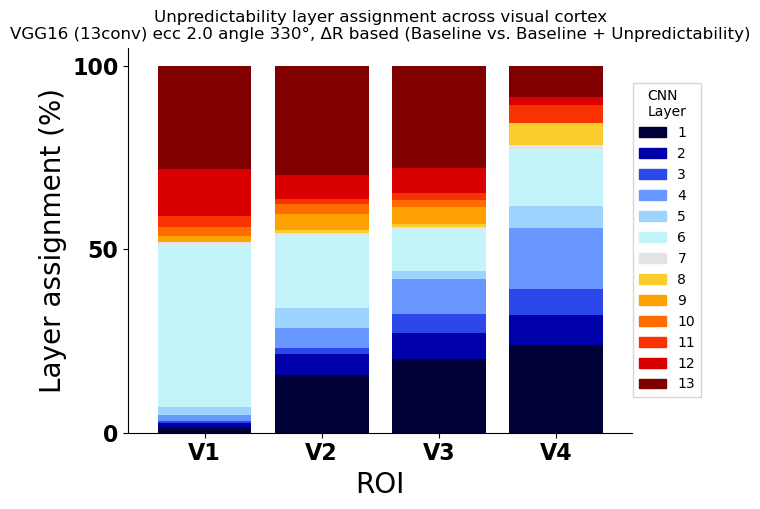

In [56]:
angles = [90, 210, 330]

# stacked_dfs = []

# subs = [subj for subj in NSP.subjects if subj != "subj02"]

for angle in angles:
    stacked_dfs = []

    for subject in NSP.subjects:
    
    # for subject in ["subj01"]:
        results = rd(subject = subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", skip_norm_lay = True)

        # results._normalize_per_voxel()
        # results.assign_layers(
        #     max_or_weighted="max", 
        #     title=f"$\mathbf{{Subject\ {subject[-1]}}}$\nUnpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)"
        # )

        results._get_max_layer()
        stacked_dfs.append(results.df)
        
    final_df = pd.concat(stacked_dfs)

    final_df

    results.assign_layers(max_or_weighted = "max",
                        verbose = True,
                        title = f"Unpredictability layer assignment across visual cortex\nVGG16 (13conv) ecc 2.0 angle {angle}°, ΔR based (Baseline vs. Baseline + Unpredictability)",
                        input_df = final_df,
                        figsize = (6.5 , 5))
        
        
    # results = rd(subject = "subj01", folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", skip_norm_lay = True)
    # results.assign_layers("max")

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


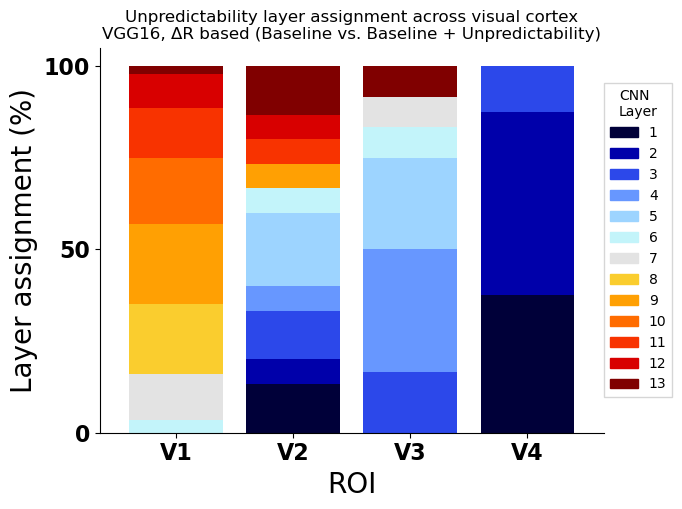

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


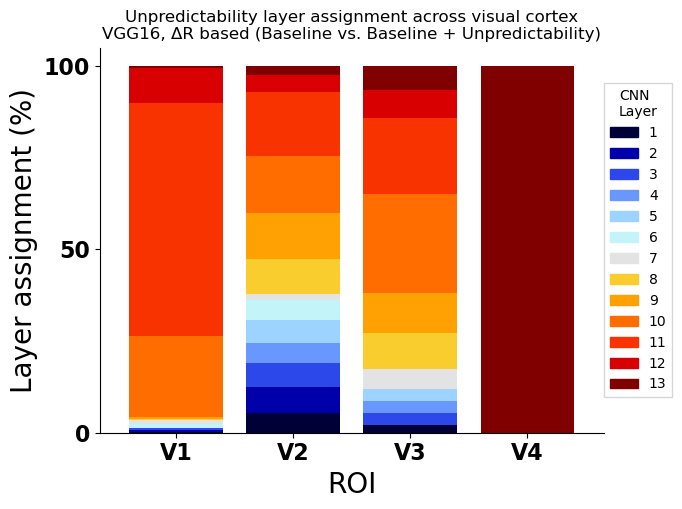

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


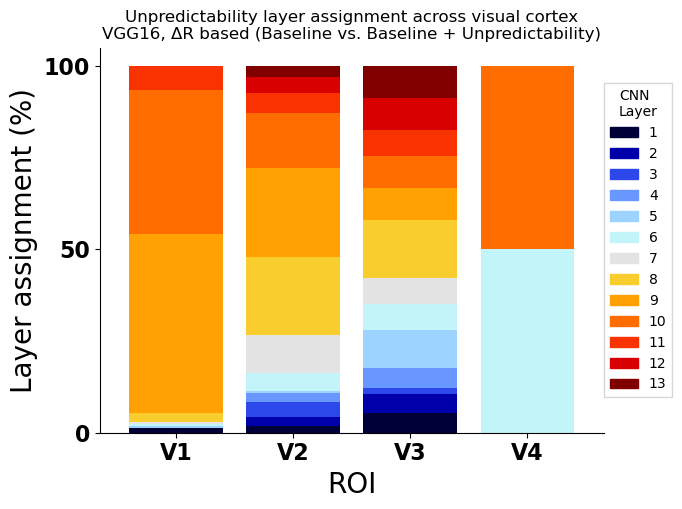

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


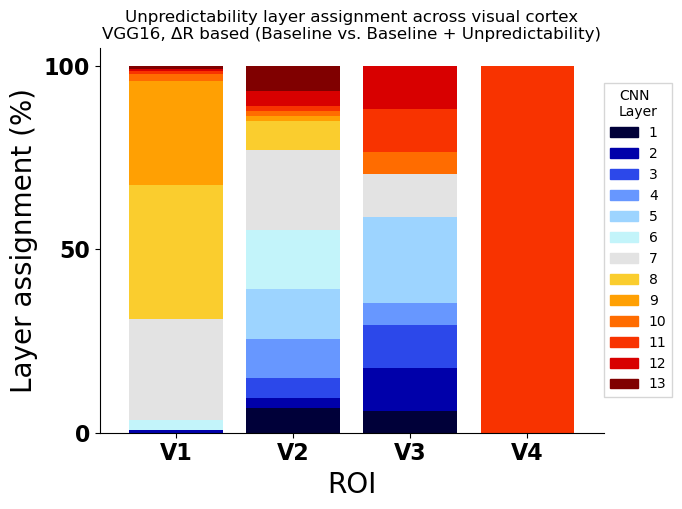

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


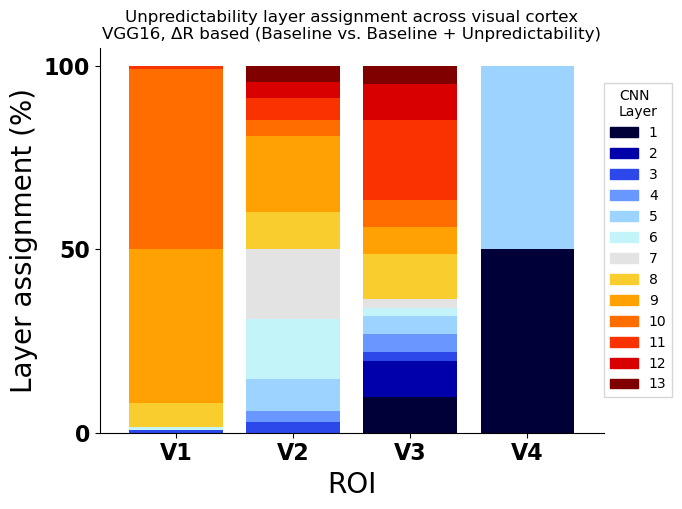

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


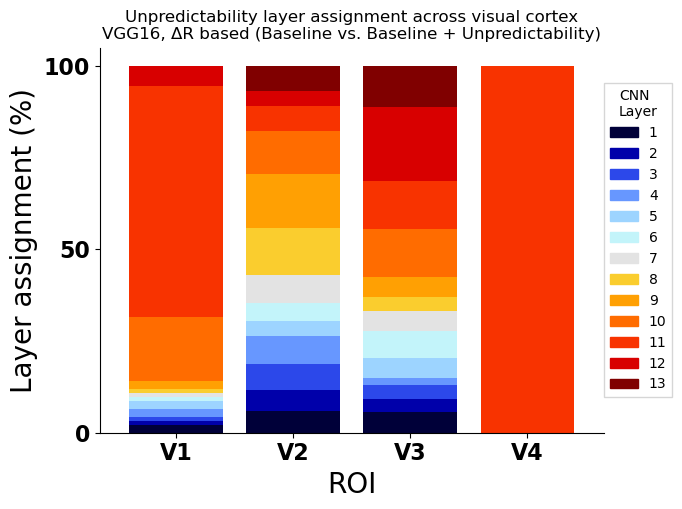

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


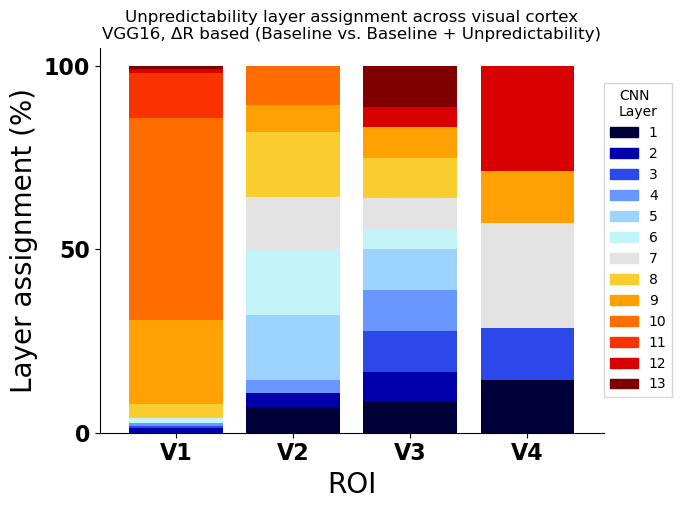

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added weighted means of the relative CNN-layer delta-R ranking to the DataFrame.


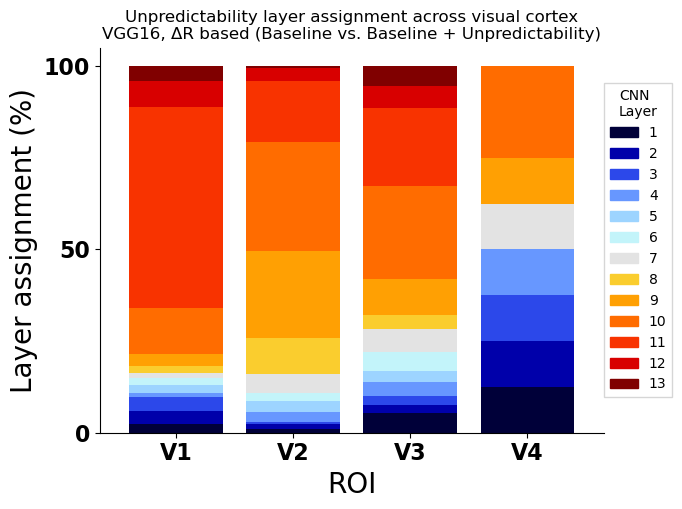

In [53]:
angle = 210

for subject in NSP.subjects:
# subject = "subj07"

    # vgg8results = rd(subject=subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)
    vgg8results = rd(subject=subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)

    vgg8results.assign_layers(max_or_weighted="weighted",
                            verbose=True,
                            title="Unpredictability layer assignment across visual cortex\nVGG16, ΔR based (Baseline vs. Baseline + Unpredictability)",
                            #   figsize = (6 , 5.5))
                            figsize = (6.5 , 5))



    # vgg8results.mean_lines(fit_polynom = True,
    #             polynom_order = 1,
    #             verbose = True,
    #             plot_catplot = False,
    #             title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)")






### Here I tried to double check the computations I do in the corrmx functions. There still seems to be something off with the baseline features. This is very strange, but I should probably eventually ask micha his correlation plot again. Maybe it is not wise to include this in the appendices, but perhaps it would be good though. 

In [14]:
Xpred = NSP.stimuli.unpred_feats(cnn_type="vggfull", content=True, style=False, ssim=False, pixel_loss=False, 
                                L1=False, MSE=True, verbose=True, outlier_sd_bound=5, subject=None)


['content_loss_0_MSE', 'content_loss_1_MSE', 'content_loss_2_MSE', 'content_loss_3_MSE', 'content_loss_4_MSE', 'content_loss_5_MSE', 'content_loss_6_MSE', 'content_loss_7_MSE', 'content_loss_8_MSE', 'content_loss_9_MSE', 'content_loss_10_MSE', 'content_loss_11_MSE', 'content_loss_12_MSE', 'content_loss_13_MSE']


In [15]:
Xpred[:,1:].shape

(73000, 13)

In [21]:
rms = NSP.stimuli.get_rms(subject=None,
                          rel_or_irrel="rel",
                          crop_prior=True,
                          )

scce = NSP.datafetch.fetch_file(f'{NSP.own_datapath}/visfeats/scce/scce_stack.pkl')

sc = np.array(scce[f'sc_z']).reshape(-1,1)
ce = np.array(scce[f'ce_z']).reshape(-1,1)

print(rms.shape)
print(sc.shape)
print(ce.shape)

# plt.plot(rms[:100])
# plt.plot(ce[:100])
# plt.plot(sc[:100])

(73000, 1)
(73000, 1)
(73000, 1)


In [22]:
feats = np.hstack((Xpred[:,1:], rms, sc, ce))

In [35]:
colnames = ['pred' + str(i) for i in range(1, Xpred.shape[1])] + ['rms', 'sc', 'ce']
colnames

['pred1',
 'pred2',
 'pred3',
 'pred4',
 'pred5',
 'pred6',
 'pred7',
 'pred8',
 'pred9',
 'pred10',
 'pred11',
 'pred12',
 'pred13',
 'rms',
 'sc',
 'ce']

In [36]:


feats_df = pd.DataFrame(feats, columns=colnames)

feats_df

pred1     pred2     pred3     pred4     pred5     pred6     pred7  \
0      0.515638  0.409788  0.427845  0.407753  0.376594  0.345387  0.330075   
1     -1.220389 -1.205311 -1.197066 -1.184531 -1.192015 -1.195509 -1.184070   
2      0.211271  0.127383  0.187142  0.174994  0.190884  0.220398  0.273704   
3     -0.582281 -0.598072 -0.565086 -0.561270 -0.520772 -0.520040 -0.540143   
4      0.977869  0.952409  0.963437  0.954088  0.996888  1.043114  1.081020   
...         ...       ...       ...       ...       ...       ...       ...   
72995 -0.927736 -0.924311 -0.914633 -0.898463 -0.892419 -0.912253 -0.933492   
72996  1.321360  1.343805  1.231028  1.173204  1.162334  1.220285  1.256306   
72997 -0.827778 -0.818242 -0.789765 -0.770691 -0.769722 -0.787563 -0.793401   
72998 -1.137067 -1.128938 -1.130962 -1.128713 -1.126301 -1.118658 -1.111813   
72999 -0.375567 -0.293240 -0.321174 -0.359717 -0.417223 -0.387736 -0.314825   

          pred8     pred9    pred10    pred11    pred12    pred13       rms  \
0      0.314731  0.291890  0.449502  0.896080  1.650299  2.063404 -0.109473   
1     -1.193772 -1.198558 -1.208539 -1.215865 -1.161674 -1.102994  3.296549   
2      0.331644  0.352411  0.443955  0.570540  0.745244  0.824179 -0.882532   
3     -0.509692 -0.496872 -0.486186 -0.492163 -0.488730 -0.476823 -0.922504   
4      1.157822  1.197972  1.272339  1.341787  1.349653  1.302754  0.582866   
...         ...       ...       ...       ...       ...       ...       ...   
72995 -0.943515 -0.942000 -0.942766 -0.918841 -0.837627 -0.779672  0.526571   
72996  1.325233  1.380333  1.431679  1.479587  1.480375  1.468198 -0.522132   
72997 -0.820048 -0.845446 -0.878471 -0.917164 -0.924270 -0.903341  2.353603   
72998 -1.100033 -1.086151 -1.106693 -1.140546 -1.147433 -1.110205  0.186938   
72999 -0.328664 -0.332927 -0.378146 -0.447697 -0.509382 -0.533907 -0.629956   

             sc        ce  
0      0.029697 -0.763302  
1     -0.581745 -0.722344  
2     -0.404522 -0.248754  
3      0.231524  0.609188  
4     -0.183262 -0.700797  
...         ...       ...  
72995  0.273824  0.126554  
72996 -1.059396 -0.598001  
72997 -0.898583 -0.371419  
72998 -0.414837 -0.348033  
72999 -0.467330 -0.912129  

[73000 rows x 16 columns]

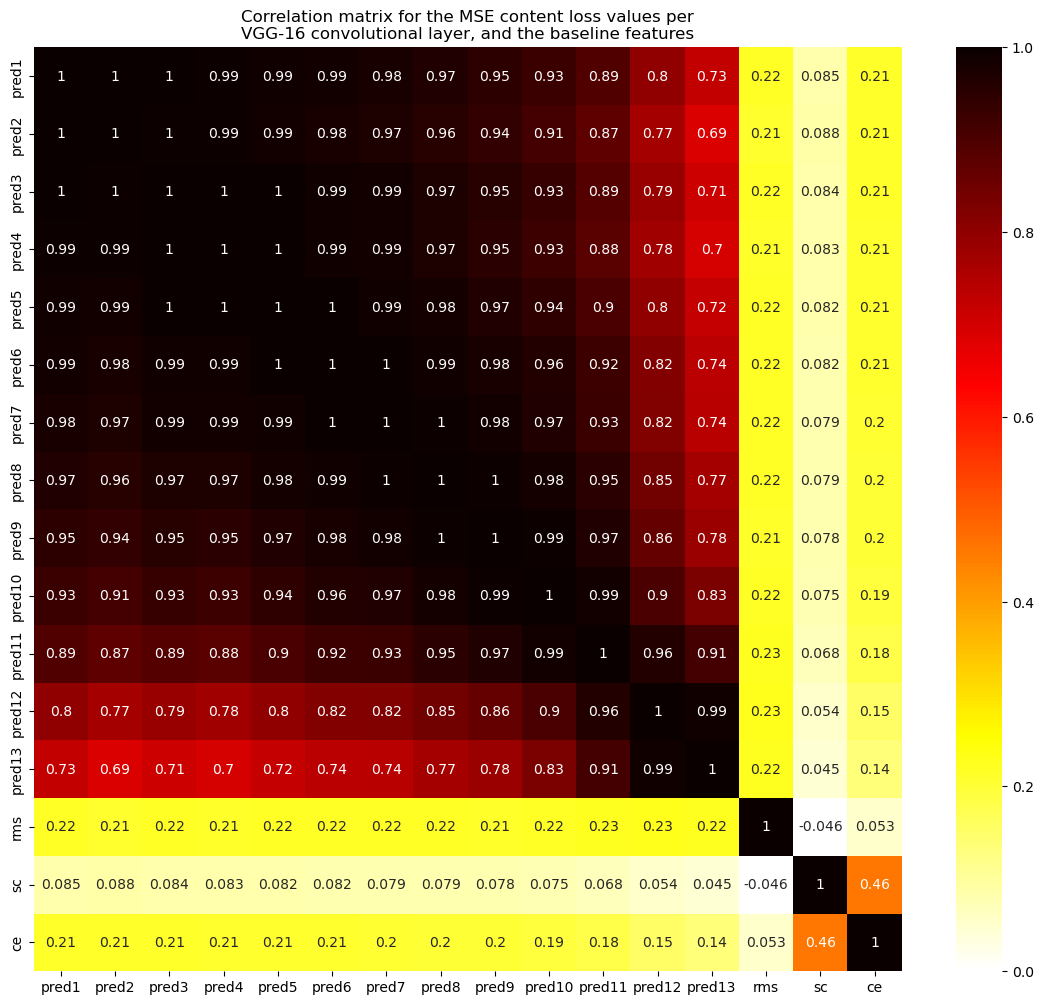

In [61]:
import seaborn as sns

corr_matrix = feats_df.corr()

figsize = (14, 12)

plt.figure(figsize=figsize)
# sns.heatmap(corr_matrix, annot=True, cmap=cmap, xticklabels=ticks, yticklabels=ticks)
sns.heatmap(corr_matrix, annot=True, cmap="hot_r", xticklabels=colnames, yticklabels=colnames, vmin=0, vmax=1)
plt.title(f'Correlation matrix for the MSE content loss values per\nVGG-16 convolutional layer, and the baseline features')
plt.show()
    

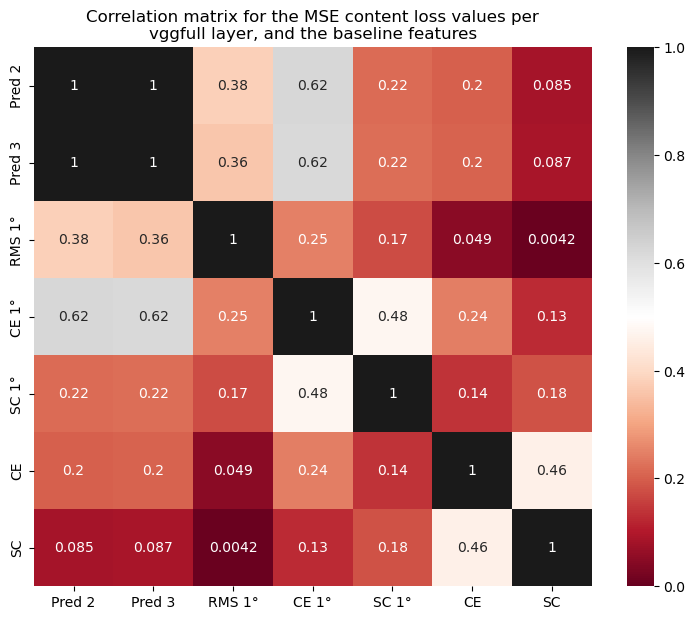

In [4]:
NSP.stimuli.plot_correlation_matrix(subject="subj01",
                                    include_rms=True,
                                    include_ce=True,
                                    include_ce_l=False,
                                    include_sc=True,
                                    include_sc_l=False,
                                    include_ce_new=True,
                                    include_sc_new=True,
                                    cmap='RdGy',
                                    cnn_type="vggfull",
                                    peripheral=True,
                                    peri_ecc=2.0,
                                    peri_angle=90,
                                    dense=True)

### Results from the robustness checks where I vary both the minimum pRF size, and the patch boundary for spatial pooling

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.0 and patch_rad = 1.0


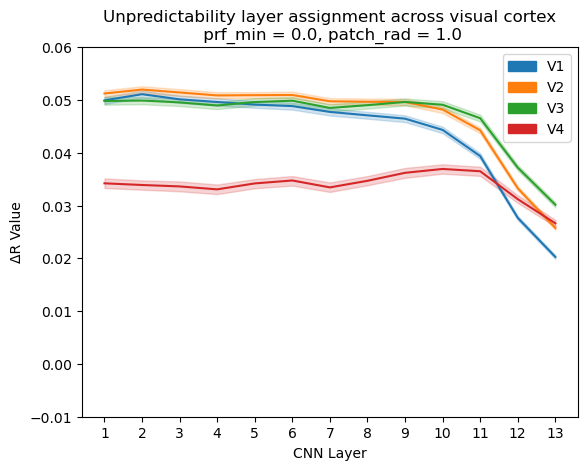

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.0 and patch_rad = 1.15


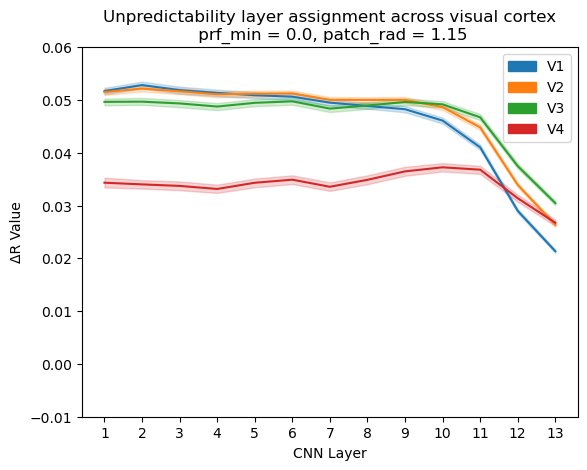

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.0 and patch_rad = 1.3


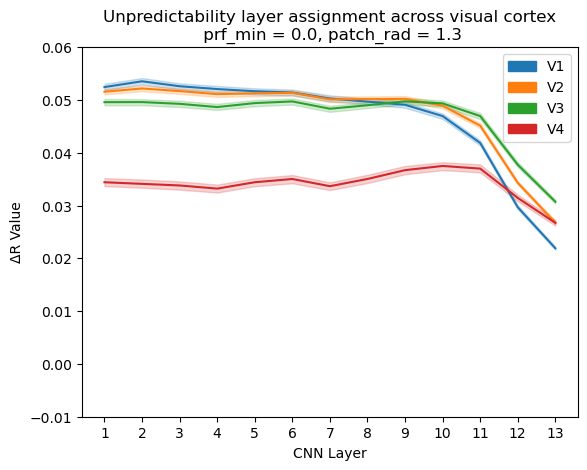

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.0 and patch_rad = 1.45


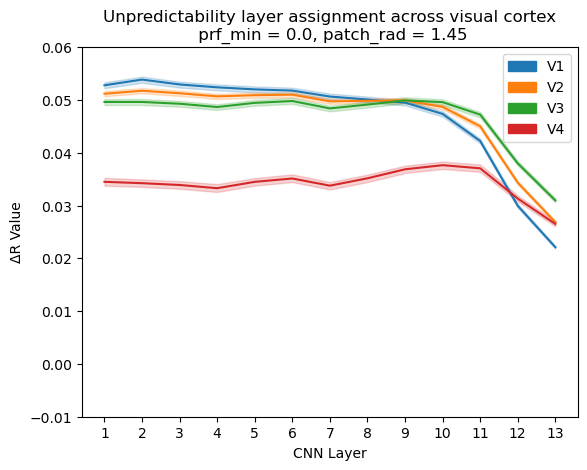

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.1 and patch_rad = 1.0


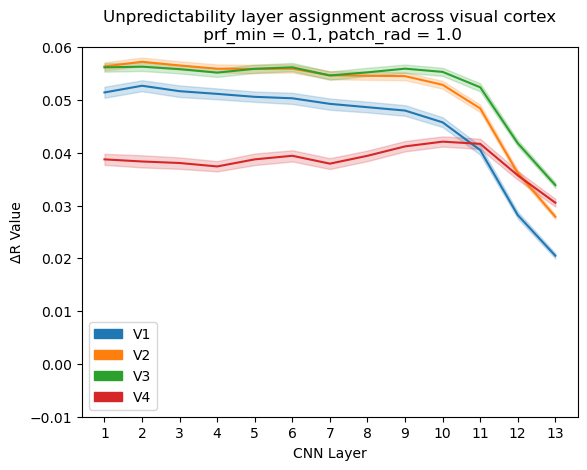

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.1 and patch_rad = 1.15


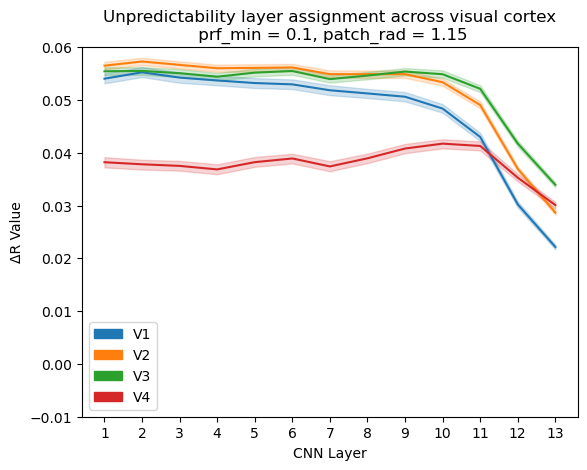

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.1 and patch_rad = 1.3


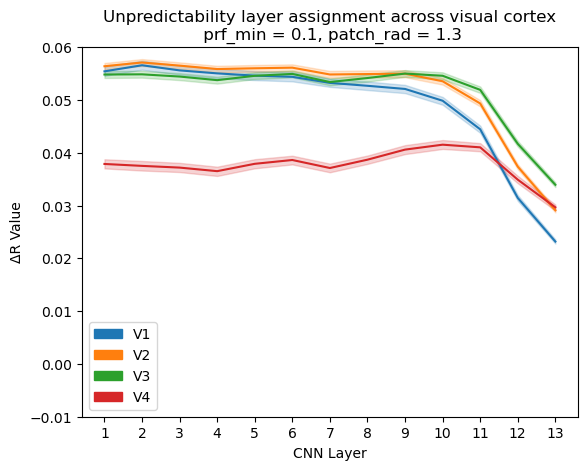

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.1 and patch_rad = 1.45


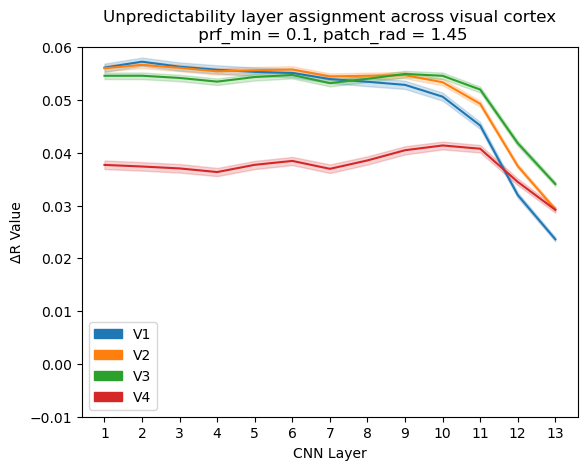

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.2 and patch_rad = 1.0


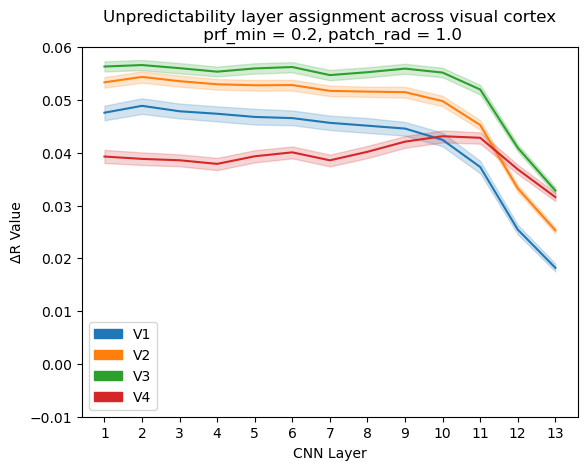

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.2 and patch_rad = 1.15


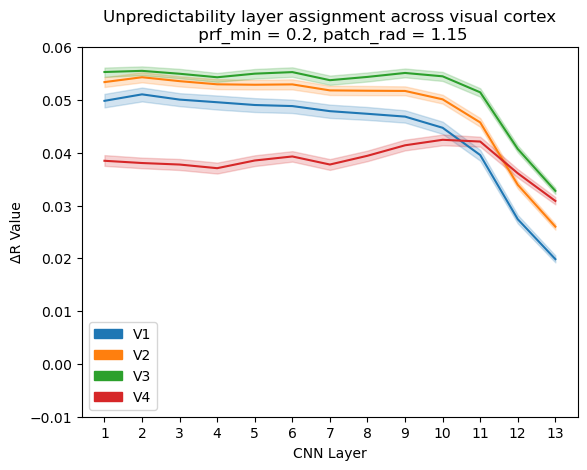

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.2 and patch_rad = 1.3


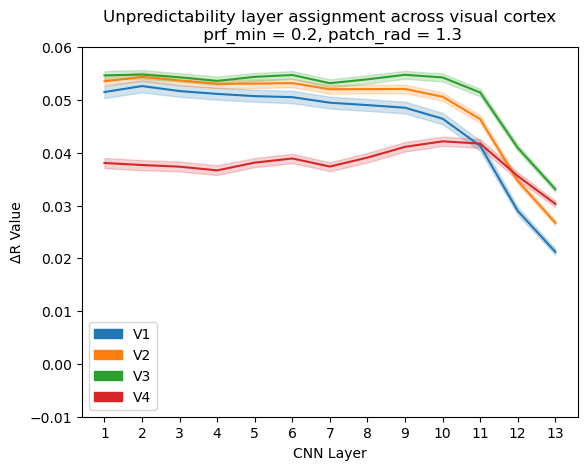

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.2 and patch_rad = 1.45


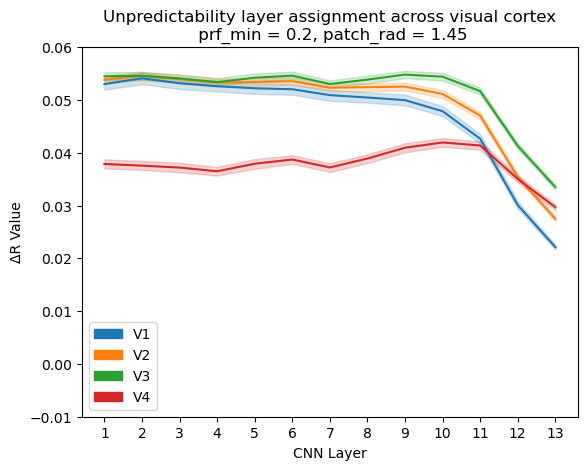

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.3 and patch_rad = 1.0


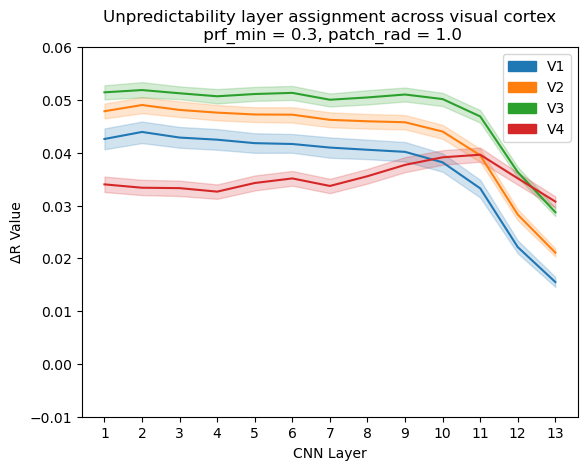

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.3 and patch_rad = 1.15


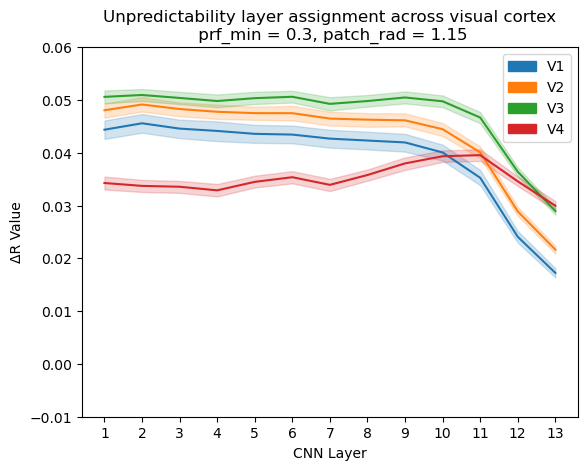

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.3 and patch_rad = 1.3


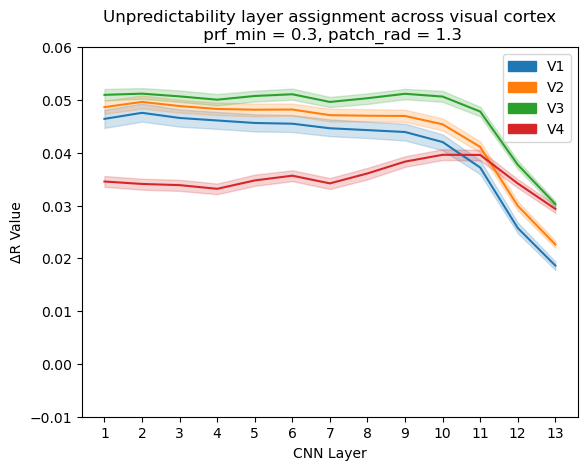

Now doing the unpredictable VGG-16 robustness analysis for prf_min = 0.3 and patch_rad = 1.45


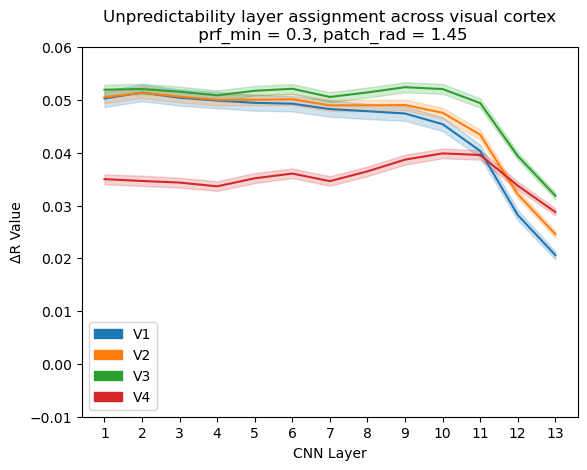

In [12]:
prf_minima = ["0.0", "0.1", "0.2", "0.3"]
patch_rads = ["1.0", "1.15", "1.3", "1.45"]


for prf_min in prf_minima:
    for patch_rad in patch_rads:
        
        

        print(f"Now doing the unpredictable VGG-16 robustness analysis for prf_min = {prf_min} and patch_rad = {patch_rad}")
        stacked_dfs = []

        for subject in NSP.subjects:
            vggrobust = rd(subject=subject, folder=f"unpred/vggfull/robust_prfmin{prf_min}_patchrad{patch_rad}", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)

            stacked_dfs.append(vggrobust.df)
            
        final_df = pd.concat(stacked_dfs)

        final_df

        # vggrobust.assign_layers(max_or_weighted = "max",
        #                     verbose = False,
        #                     title = f"Unpredictability layer assignment across visual cortex\n prf_min = {prf_min}, patch_rad = {patch_rad}",
        #                     input_df = final_df,
        #                     figsize = (6.5 , 5))


        vggrobust.mean_lines(fit_polynom = False,
                    polynom_order = 4,
                    verbose = False,
                    plot_catplot = False,
                    input_df = final_df,
                    title = f"Unpredictability layer assignment across visual cortex\n prf_min = {prf_min}, patch_rad = {patch_rad}",
                    # fixed_ybottom = 0.0001,
                    # fixed_ytop = .1,
                    log_y = False,            
                    fixed_ybottom = -.01,
                    fixed_ytop = .06)
        # )

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


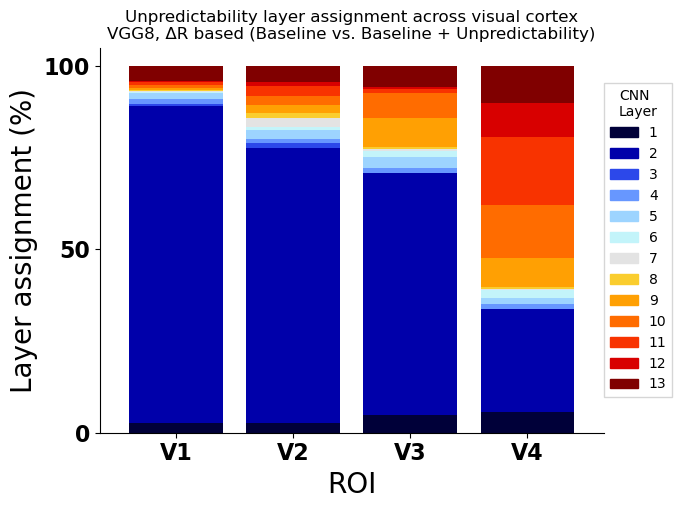

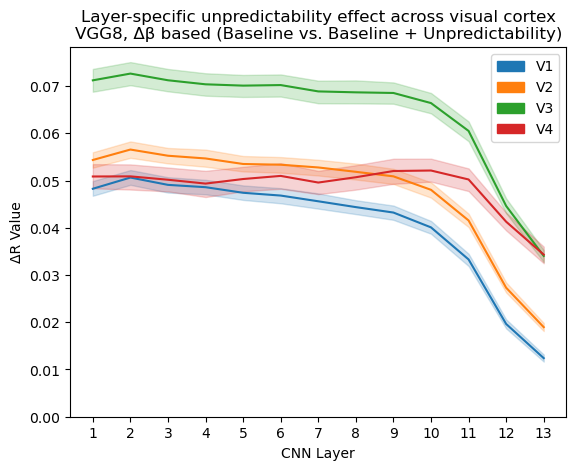

In [5]:
# for subject in NSP.subjects:
subject = "subj01"

vgg8results = rd(subject=subject, folder="unpred/vggfull/robust_prfmin0.0_patchrad1.0", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)

vgg8results.assign_layers(max_or_weighted="max",
                        verbose=True,
                        title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
                        #   figsize = (6 , 5.5))
                        figsize = (6.5 , 5))



vgg8results.mean_lines(fit_polynom = False,
            polynom_order = 4,
            verbose = True,
            plot_catplot = False,
            title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)")






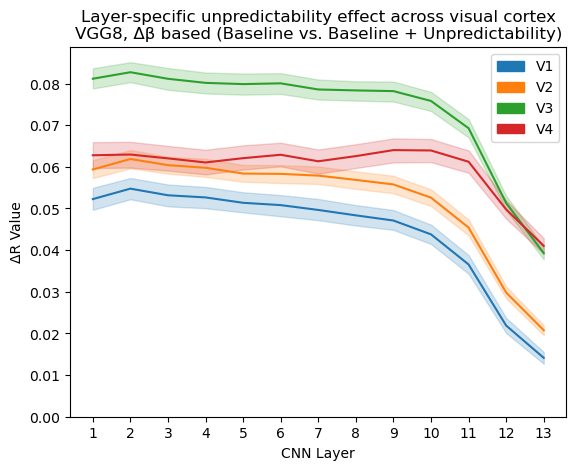

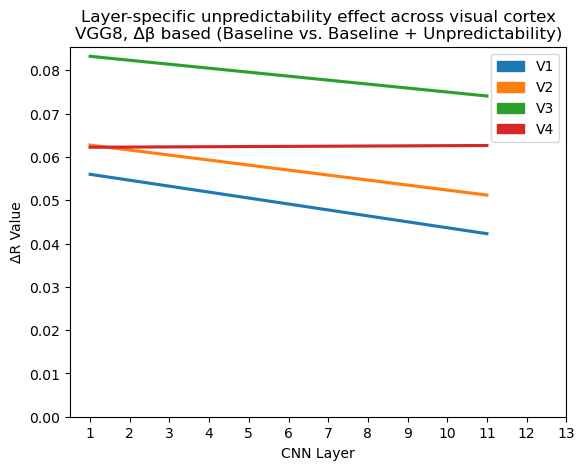

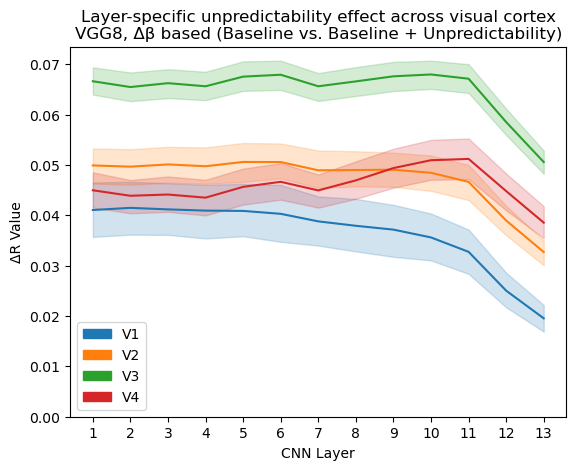

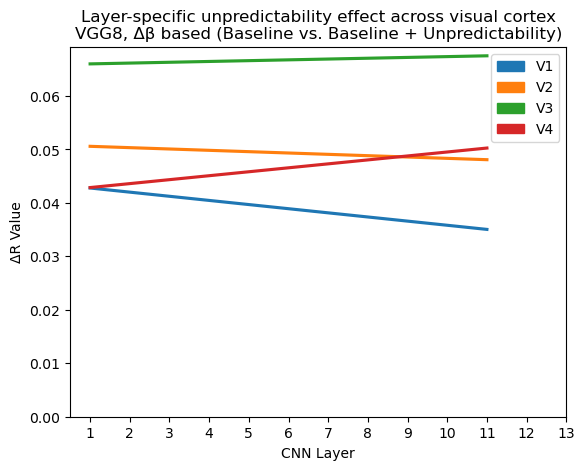

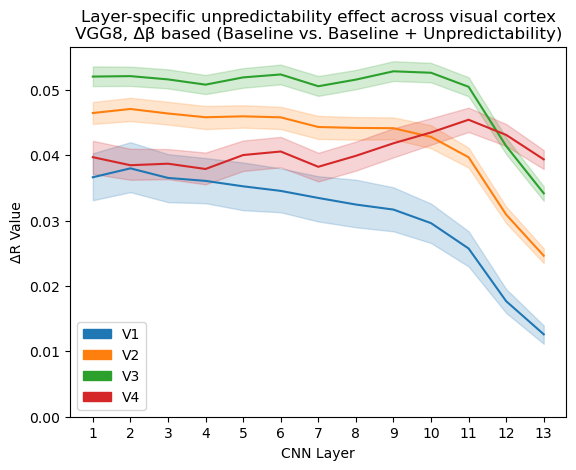

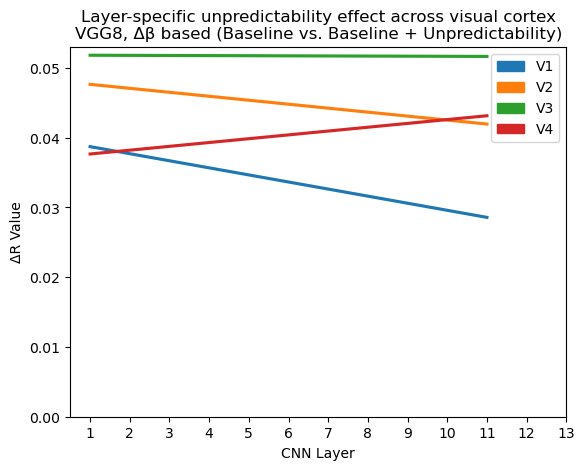

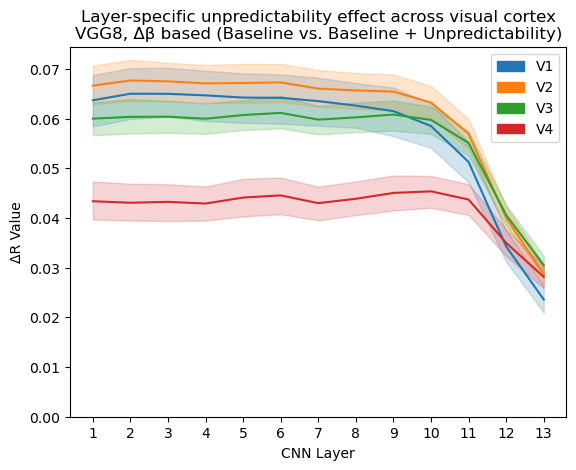

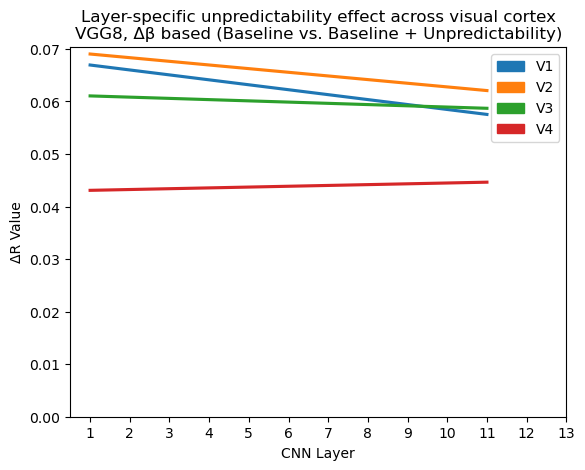

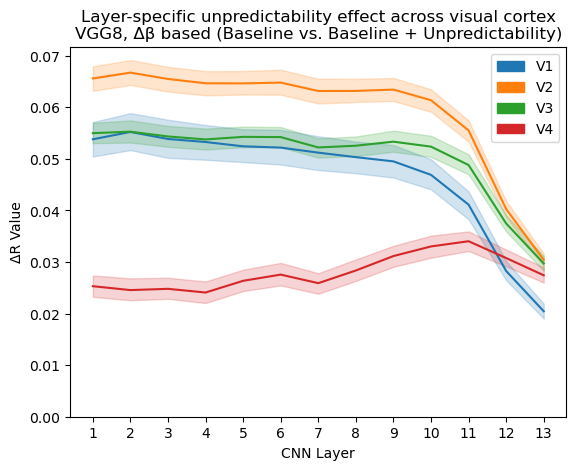

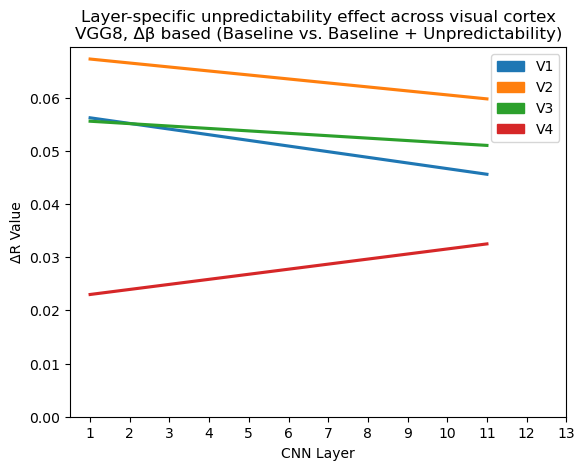

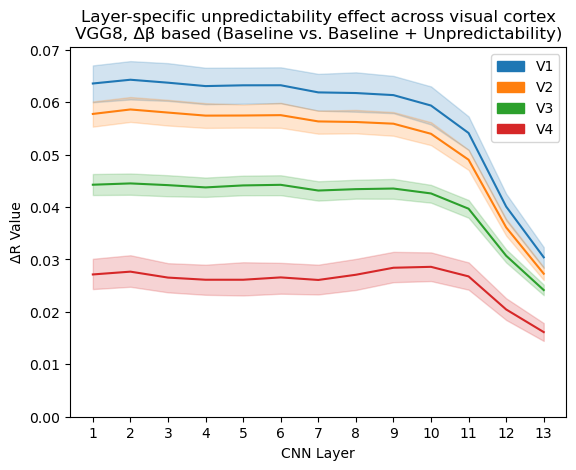

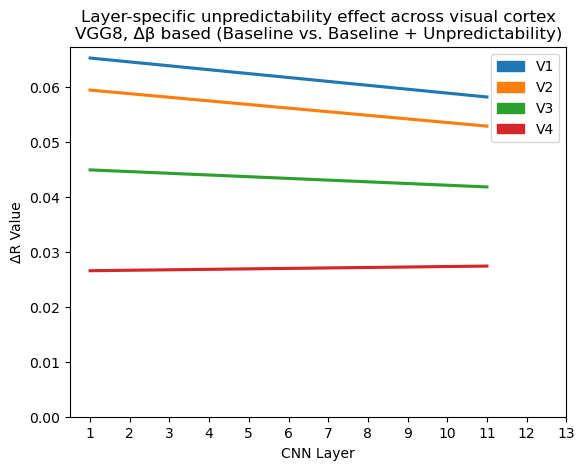

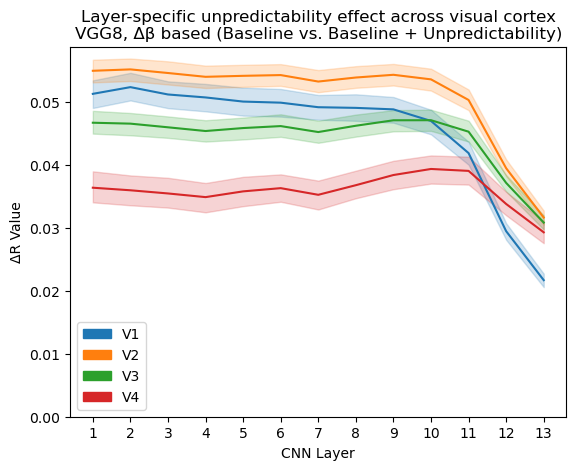

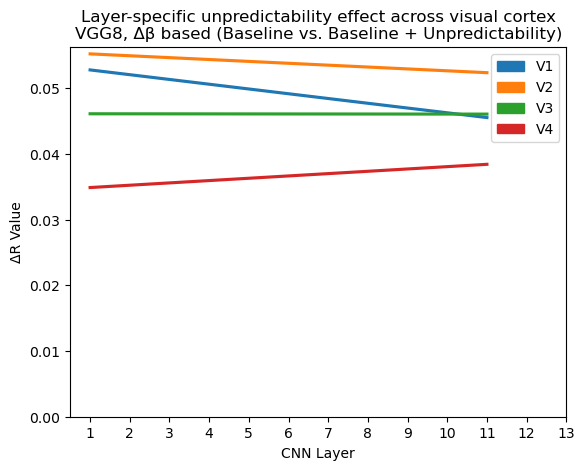

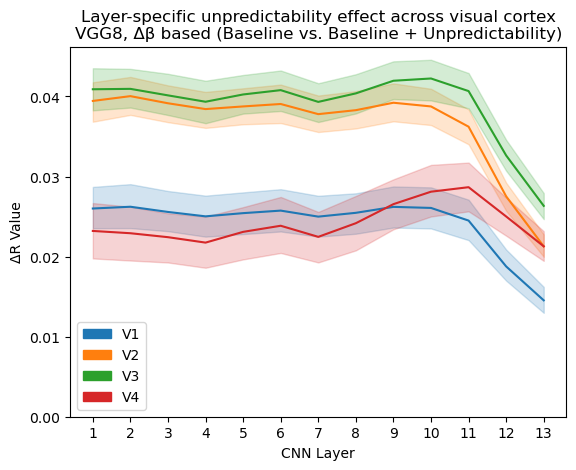

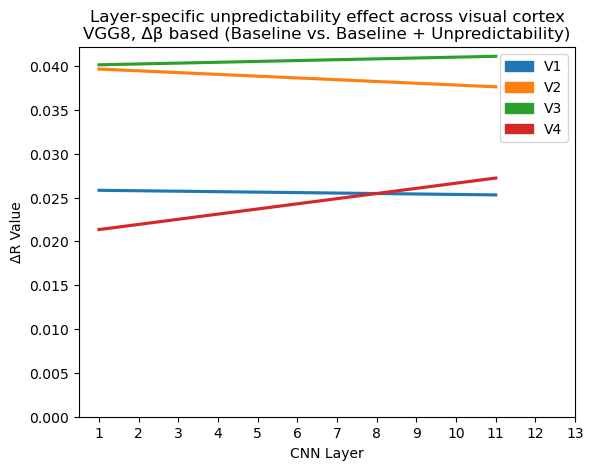

In [3]:
for subject in NSP.subjects:
# subject = "subj02"

    # vgg8results = rd(subject=subject, folder="unpred_encodingbl_VGG_all", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)
    vgg8results = rd(subject=subject, folder="unpred/vggfull", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)

    # vgg8results.assign_layers(max_or_weighted="max",
    #                         verbose=True,
    #                         title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
    #                         #   figsize = (6 , 5.5))
    #                         figsize = (6.5 , 5))



    vgg8results.mean_lines(fit_polynom = False,
                polynom_order = 4,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)",
                overlay=False,)

    vgg8results.mean_lines(fit_polynom = True,
                polynom_order = 1,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)",
                overlay=False,
                fit_to=11,
                plot_ci=True)

    # vgg8results.df

Processing file vggfull_lay8_regdf.csv for layer 9
Processing file vggfull_lay5_regdf.csv for layer 6
Processing file vggfull_lay10_regdf.csv for layer 11
Processing file vggfull_lay9_regdf.csv for layer 10
Processing file vggfull_lay1_regdf.csv for layer 2
Processing file vggfull_lay4_regdf.csv for layer 5
Processing file vggfull_lay6_regdf.csv for layer 7
Processing file vggfull_lay12_regdf.csv for layer 13
Processing file vggfull_lay7_regdf.csv for layer 8
Processing file vggfull_lay11_regdf.csv for layer 12
Processing file vggfull_lay13_regdf.csv for layer 14
Processing file vggfull_lay2_regdf.csv for layer 3
Processing file vggfull_lay3_regdf.csv for layer 4


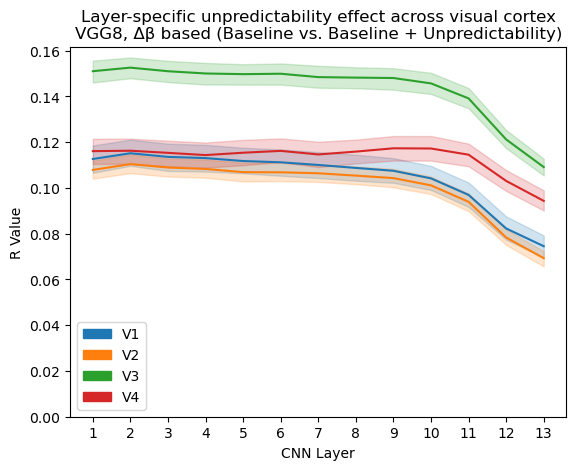

In [12]:
# for subject in NSP.subjects:
subject = "subj01"

vgg8results = rd(subject=subject, folder="unpred/vggfull", model="vggfull", statistic="R", verbose=True)

# vgg8results.assign_layers(max_or_weighted="weighted",
#                         verbose=True,
#                         title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
#                         #   figsize = (6 , 5.5))
#                         figsize = (6.5 , 5))



vgg8results.mean_lines(fit_polynom = False,
              polynom_order = 4,
              verbose = True,
              plot_catplot = False,
              title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)")




# vgg8results.df

In [7]:
vggfulldict = NSP.datafetch.load_pred_estims(cnn_type="vggfull")

In [10]:
# Alternated script to fix the correct column order now that they have 2 digits
import re

vggdf = pd.DataFrame(vggfulldict)

# Convert each list of values into separate rows
df_exploded = vggdf.apply(lambda x: x.explode())

# Extract the integer from the column name
def extract_number(col_name):
    match = re.search(r'loss_(\d+)', col_name)
    return int(match.group(1)) if match else float('inf')

# Sort the column names
sorted_columns = sorted(df_exploded.columns, key=extract_number)

# Reorder the DataFrame columns
df_exploded = df_exploded[sorted_columns]

# Reset the index and save to CSV
df_exploded.reset_index(drop=True, inplace=True)
df_exploded.to_csv("./data/custom_files/visfeats/pred/all_predestims_vggfull.csv", index=False)

In [12]:
df_exploded.keys()

Index(['content_loss_0_L1', 'content_loss_0_MSE', 'style_loss_0_L1',
       'style_loss_0_MSE', 'content_loss_1_L1', 'content_loss_1_MSE',
       'style_loss_1_L1', 'style_loss_1_MSE', 'content_loss_2_L1',
       'content_loss_2_MSE', 'style_loss_2_L1', 'style_loss_2_MSE',
       'content_loss_3_L1', 'content_loss_3_MSE', 'style_loss_3_L1',
       'style_loss_3_MSE', 'content_loss_4_L1', 'content_loss_4_MSE',
       'style_loss_4_L1', 'style_loss_4_MSE', 'content_loss_5_L1',
       'content_loss_5_MSE', 'style_loss_5_L1', 'style_loss_5_MSE',
       'content_loss_6_L1', 'content_loss_6_MSE', 'style_loss_6_L1',
       'style_loss_6_MSE', 'content_loss_7_L1', 'content_loss_7_MSE',
       'style_loss_7_L1', 'style_loss_7_MSE', 'content_loss_8_L1',
       'content_loss_8_MSE', 'style_loss_8_L1', 'style_loss_8_MSE',
       'content_loss_9_L1', 'content_loss_9_MSE', 'style_loss_9_L1',
       'style_loss_9_MSE', 'content_loss_10_L1', 'content_loss_10_MSE',
       'style_loss_10_L1', 'style_los

In [13]:
Xpred = NSP.stimuli.unpred_feats(cnn_type="vggfull", content=True, style=False, ssim=False, pixel_loss=False, 
                                 L1=False, MSE=True, verbose=True, outlier_sd_bound=5, subject="subj01")


['content_loss_0_MSE', 'content_loss_1_MSE', 'content_loss_2_MSE', 'content_loss_3_MSE', 'content_loss_4_MSE', 'content_loss_5_MSE', 'content_loss_6_MSE', 'content_loss_7_MSE', 'content_loss_8_MSE', 'content_loss_9_MSE', 'content_loss_10_MSE', 'content_loss_11_MSE', 'content_loss_12_MSE', 'content_loss_13_MSE']


In [4]:
Xpred.shape

(30000, 14)

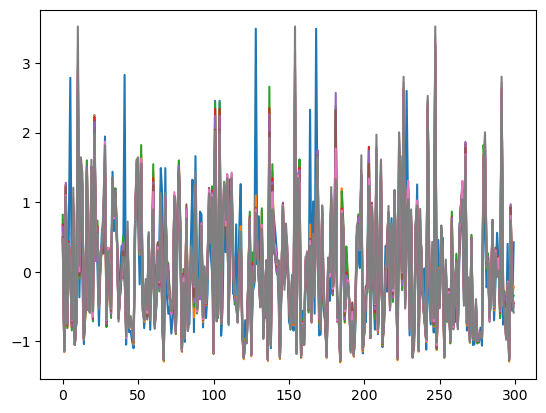

In [14]:
for i in range(8):
    
    plt.plot(Xpred[:,i][1700:2000])
    
    

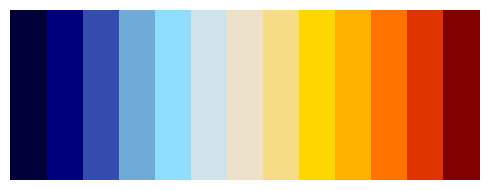

In [26]:
# barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000080', '#CCCCCC', '#FFA500', '#FF0000'], N=13)
# barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#000090', '#CCCCCC', '#FFA000', '#FF0025', '#800000'], N=13)
# barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#6699CC', '#CCCCCC', '#F5DEB3', '#FFFF01', '#FFA500', '#FF4500', '#800000'], N=13)
barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#6699CC', '#90DEFF', '#E5E5E5', '#F5DEB3', '#FFD700', '#FFA500', '#FF4500', '#800000'], N=13)
# barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#6699CC', '#CCCCCC', '#FFFFFF', '#F5DEB3', '#FFD700', '#FFA500', '#FF4500', '#800000'], N=13)
# barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#6699CC', '#FFFFFF', '#F5DEB3', '#FFD700', '#FF4500', '#800000'], N=13)

# colors = ['#000039', '#000090', '#6699CC', '#CCCCCC', '#F5DEB3', '#FFFF00', '#FFA500', '#FF4500', '#800000']
# barcmap = LinearSegmentedColormap.from_list('CustomMap', colors)


NSP.utils.display_cmap(barcmap)

In [3]:
rois, roi_masks, viscortex_masks = NSP.cortex.visrois_dict(verbose=False)
prf_dict = NSP.cortex.prf_dict(rois, roi_masks)

In [34]:
from torchvision.models.feature_extraction import (
    create_feature_extractor,
    get_graph_node_names,
)
from torchvision import models

vgg8model = models.vgg16(pretrained=True)


train_nodes, _ = get_graph_node_names(vgg8model)
print(train_nodes)

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20', 'features.21', 'features.22', 'features.23', 'features.24', 'features.25', 'features.26', 'features.27', 'features.28', 'features.29', 'features.30', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']


In [9]:
rs = rd(subject="subj01", folder="unpred", model="vgg-b", statistic="delta_r", verbose=False)
len(rs.cnn_layers)

6

In [ ]:
for subject in NSP.subjects:
    # subject = "subj01"

    vggfullresults = rd(subject=subject, folder="unpred/vggfull", model="vggfull", statistic="delta_r", verbose=False)

    vggfullresults._delta_r_lines()
    # vgg8results.assign_layers(max_or_weighted="weighted",
    #                         verbose=True,
    #                         title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
    #                         #   figsize = (6 , 5.5))
    #                         figsize = (6.5 , 5))

In [ ]:
for subject in NSP.subjects:
    # subject = "subj01"

    vgg8results = rd(subject=subject, folder="unpred/vggfull", model="vggfull", statistic="delta_r", verbose=True)

    vgg8results.assign_layers(max_or_weighted="weighted",
                            verbose=True,
                            title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
                            #   figsize = (6 , 5.5))
                            figsize = (6.5 , 5))



    vgg8results.mean_lines(fit_polynom = False,
                  polynom_order = 4,
                  verbose = True,
                  plot_catplot = False,
                  title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)")




    # vgg8results.df

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


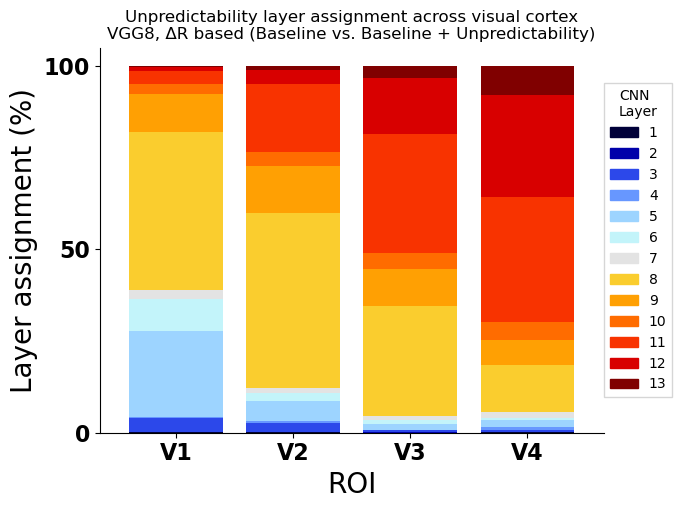

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


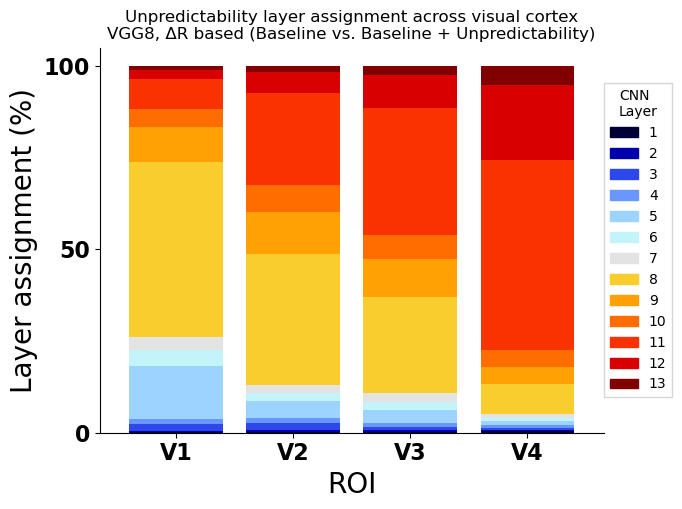

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


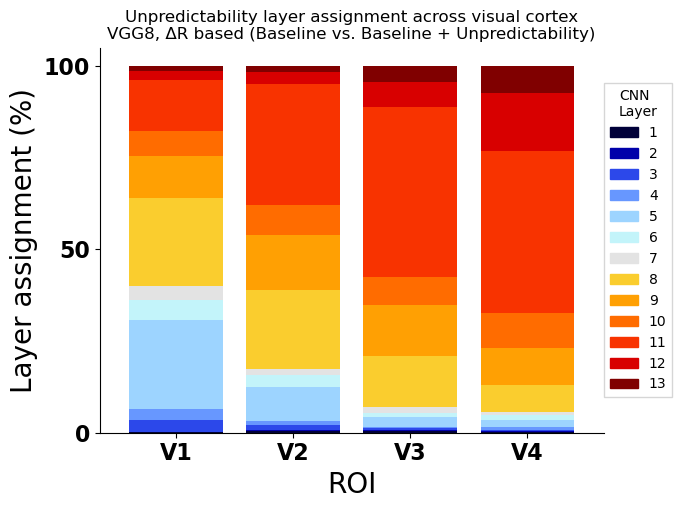

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


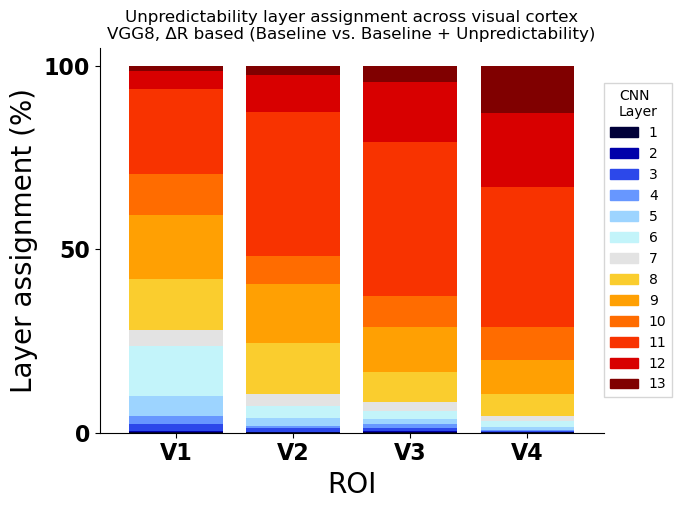

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


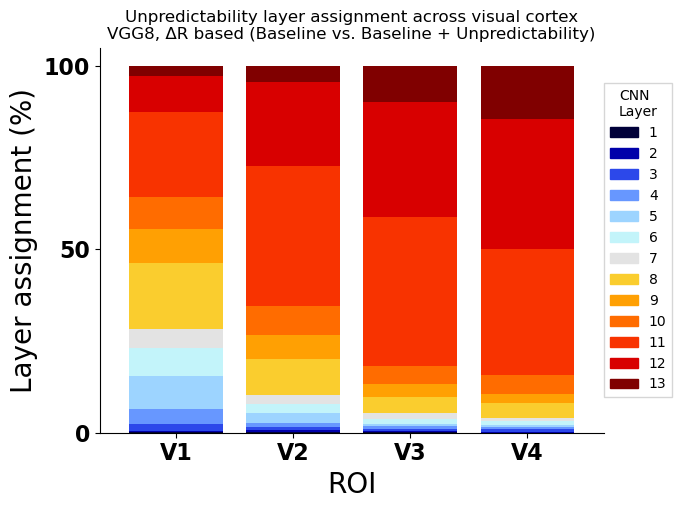

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


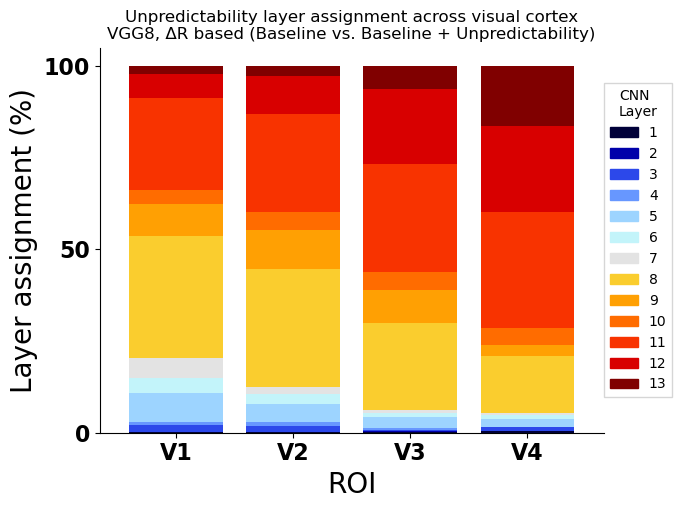

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


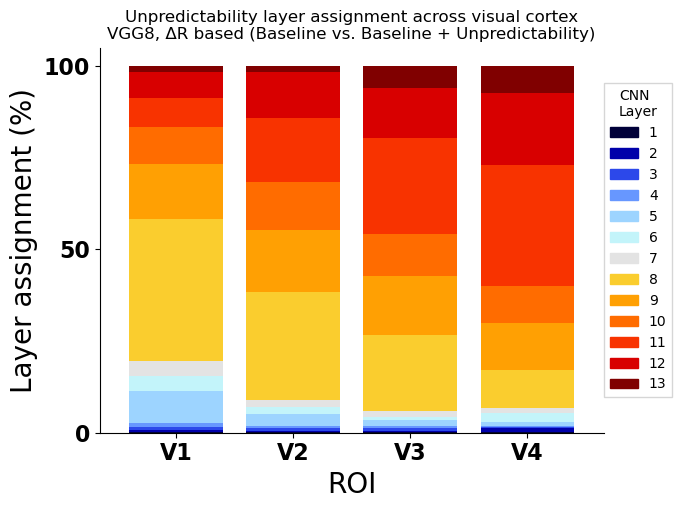

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


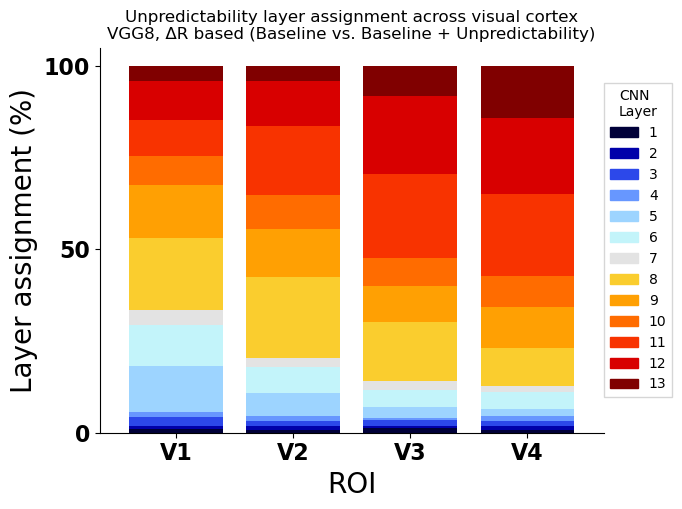

In [3]:
for subject in NSP.subjects:
    # subject = "subj01"

    vgg8results = rd(subject=subject, folder="encoding", model="VGG", statistic="delta_r", verbose=False)

    vgg8results.assign_layers(max_or_weighted="max",
                            verbose=True,
                            title="Unpredictability layer assignment across visual cortex\nVGG8, ΔR based (Baseline vs. Baseline + Unpredictability)",
                            #   figsize = (6 , 5.5))
                            figsize = (6.5 , 5))



    # vgg8results.mean_lines(fit_polynom = False,
    #               polynom_order = 4,
    #               verbose = True,
    #               plot_catplot = True,
    #               title = "Layer-specific unpredictability effect across visual cortex\nVGG8, Δβ based (Baseline vs. Baseline + Unpredictability)")




    # vgg8results.df

In [4]:
resultaten = rd(subject="subj01", folder="encoding", model="VGG", statistic="delta_r")

resultaten.assign_layers(max_or_weighted = "max",
                      verbose = True,
                      # title = "Unpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)",
                    #   input_df = final_df,
                      figsize = (6.5 , 5))

# resultaten.mean_lines(fit_polynom = False,
#               polynom_order = 2,
#               verbose = True,
#               plot_catplot = False,
#               title = "Layer-specific unpredictability effect across visual cortex\nVGG-b, Δβ based (Baseline vs. Baseline + Unpredictability)")


Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.


ValueError: attempt to get argmax of an empty sequence

In [ ]:
for subject in NSP.subjects:
    print(f"Now: {subject}")
    resultaten = rd(subject=subject, folder="unpred/vgg8", model="vgg8", statistic="delta_r")

    # resultaten.assign_layers(max_or_weighted = "max",
    #                       verbose = True,
    #                       title = "Unpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)",
    #                     #   input_df = final_df,
    #                       figsize = (6 , 5.5))

    resultaten.mean_lines(fit_polynom = False,
                polynom_order = 5,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific unpredictability effect across visual cortex\nVGG-b, Δβ based (Baseline vs. Baseline + Unpredictability)")


In [ ]:
for subject in NSP.subjects:
    rs = rd(subject = "subj01", folder="unpred", model="vgg-b", statistic="delta_beta")
    # rs._normalize_per_voxel()
    # rs.assign_layers(max_or_weighted="weighted")

    rs.df

    rs.mean_lines(fit_polynom = False,
                polynom_order = 2,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific unpredictability effect across visual cortex\nVGG-b, Δβ based (Baseline vs. Baseline + Unpredictability)")

    # rs.cnn_layers

    # rs.df

    rs._delta_r_lines()

In [ ]:

for subject in NSP.subjects:
    rs = rd(subject = subject, folder="encoding", model="alexnet", statistic="R")
    # rs._normalize_per_voxel()
    # rs.assign_layers(max_or_weighted="max")
    rs.mean_lines(fit_polynom = False,
                polynom_order = 2,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific encoding effect across visual cortex\nAlexNet, R based (Encoding model vs. shuffled model)")

    # rs.cnn_layers

    # rs.df

    rs._delta_r_lines()

In [4]:
# Create niftis and surface files for unpredictability and encoding regressions (Takes a few minutes)
for subject in NSP.subjects:
    for this_reg in ["unpred", "encoding"]:
        model = "vgg-b" if this_reg == "unpred" else "alexnet"
        reg_to_nifti(subject=subject,
                    reg_type=this_reg,
                    model=model,
                    assign_stat="max",
                    reg_stat="delta_r",
                    plot_brain=False,
                    plot_lay_assign=False,
                    save_nifti=False)

        # vol_to_surf(subject=subject,
        #             source_file_name=f"{this_reg}_{model}_layassign_max",
        #             interpmethod="wta")

KeyboardInterrupt: 

# This is for the aggregated encoding baseline unpredictability analysis layer assignment stacked barplot for each of the included layers from the VGG-16

In [6]:
### I ONLY NEED TO DO THE LAYASSIGN PLOTS FOR THIS ONE NOW, BUT THE LAYERS THAT ARE GOOD AT ENCODING
# PRETTY MUCH ERADICATE THE EFFECT OF THE SINGLE UNPREDICTABILITY REGRESSOR. 

Now doing the encoding baseline regression for layer all of VGG-16


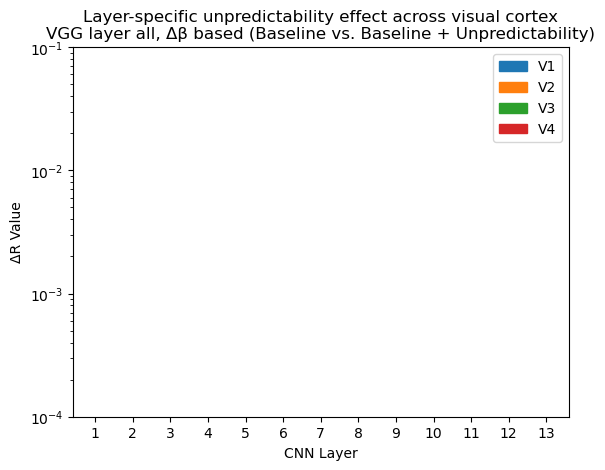

In [3]:
# baseline_layers = [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]
# baseline_layers = [0, 28]

# for layer in baseline_layers:
layer = "all"

print(f"Now doing the encoding baseline regression for layer {layer} of VGG-16")
stacked_dfs = []

for subject in NSP.subjects:
    
    vggfullencblresults = rd(subject=subject, folder=f"unpred_encodingbl_VGG_{layer}", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True)
    # vggfullencblresults._get_max_layer()
    stacked_dfs.append(vggfullencblresults.df)
    
final_df = pd.concat(stacked_dfs)

final_df

# vggfullencblresults.assign_layers(max_or_weighted = "max",
#                     verbose = False,
#                     title = "Unpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)",
#                     input_df = final_df,
#                     figsize = (6.5 , 5))


vggfullencblresults.mean_lines(fit_polynom = False,
            polynom_order = 4,
            verbose = False,
            plot_catplot = False,
            input_df = final_df,
            title = f"Layer-specific unpredictability effect across visual cortex\nVGG layer {layer}, Δβ based (Baseline vs. Baseline + Unpredictability)",
            fixed_ybottom = 0.0001,
            fixed_ytop = .1,
            log_y = True,            
#             fixed_ybottom = -.01,
#             fixed_ytop = .06)
)

# This is for the aggregated encoding analysis layer assignment stacked barplot

DataFrame changed: Added the maximum layer index to the DataFrame.


DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
DataFrame changed: Added the maximum layer index to the DataFrame.
Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


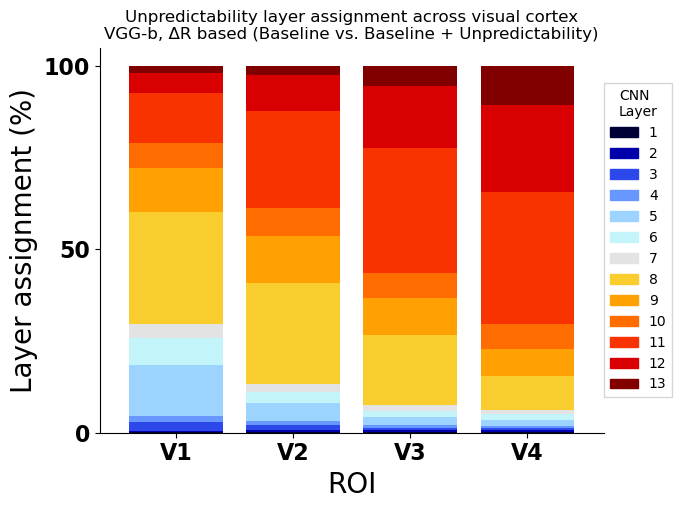

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


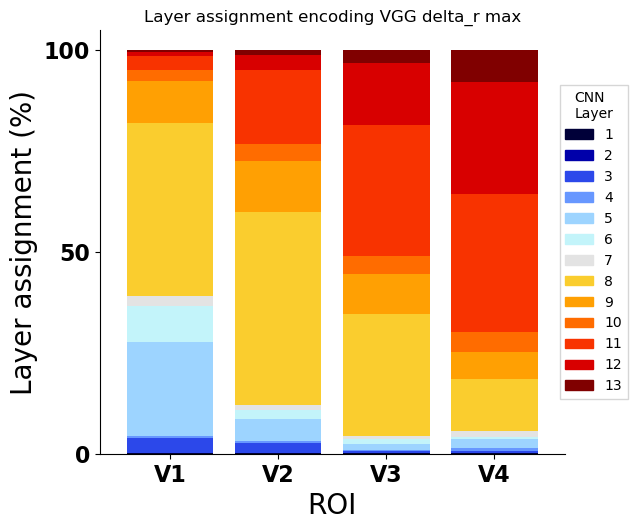

In [6]:

stacked_dfs = []

for subject in NSP.subjects:
# for subject in ["subj01"]:
    results = rd(subject = subject, folder="encoding", model="VGG", statistic="delta_r")

    # results._normalize_per_voxel()
    # results.assign_layers(
    #     max_or_weighted="max", 
    #     title=f"$\mathbf{{Subject\ {subject[-1]}}}$\nUnpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)"
    # )

    results._get_max_layer()
    stacked_dfs.append(results.df)
    
final_df = pd.concat(stacked_dfs)

final_df

results.assign_layers(max_or_weighted = "max",
                      verbose = True,
                      title = "Unpredictability layer assignment across visual cortex\nVGG-b, ΔR based (Baseline vs. Baseline + Unpredictability)",
                      input_df = final_df,
                      figsize = (6.5 , 5))
    
    
results = rd(subject = "subj01", folder="encoding", model="VGG", statistic="delta_r")
results.assign_layers("max")


In [7]:
from funcs.utility import generate_bell_vector

# Function to plot the hypotheses for the feature and unpredictability sensitivity
def hypotheses_plot(n_layers:int=5, bell_width:float=.0115, bell_loc:float=3.0, bell_kurtosis:float=.01):

    hypothesis_1 = hypothesis_2 = np.zeros((4, n_layers))
    for i in range(4):
        loc = i/bell_loc
        # generate_bell_vector(5, 0.15, loc)
        hypothesis_1[i, :] = np.array(generate_bell_vector(n_layers, bell_width, loc, bell_kurtosis, plot = 'n'))
        
    hypothesis_3 = np.zeros((4, n_layers))
    for i in range(4):
        loc = i/bell_loc
        # generate_bell_vector(5, 0.15, loc)
        hypothesis_3[np.abs(i - 3), :] = np.array(generate_bell_vector(n_layers, bell_width, loc, bell_kurtosis, plot = 'n'))
        
    # Keeping the same values for Hypothesis 4
    hypothesis_4 = np.zeros((4, n_layers))
    for i in range(4):
        hypothesis_4[i, :] = hypothesis_1[3]

    hypotheses = [hypothesis_1, hypothesis_2, hypothesis_3, hypothesis_4]

    # Visual areas
    visual_areas = ['V1', 'V2', 'V3', 'V4']

    # Define a gradient colormap from dark blue to light red
    # cmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000080', '#CCCCCC', '#FFA500', '#FF0000'], N=n_layers)
    # cmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000080', '#CCCCCC', '#FFA000', '#FF0025', '#800000'], N=13)
    # cmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000039', '#000090', '#6699CC', '#90DEFF','#CBEAE8', '#E9E9E9', '#F5DEB3', '#FFD700', '#FFA500', '#FF4500', '#800000'], N=13)
    cmap = LinearSegmentedColormap.from_list(
        "NavyBlueVeryLightGreyDarkRed",
        [
            "#000039",
            "#0000C0",
            "#426CFF",
            "#8DC2FF",
            "#BDF7FF",
            "#E3E3E3",
            "#FFC90A",
            "#FF8B00",
            "#FF4D00",
            "#E90000",
            "#800000",
        ],
        N=13,
    )

    # Plotting
    # fig, axs = plt.subplots(1, 4, figsize=(np.array([14, 4.25])*1.1), sharey=True)
    fig, axs = plt.subplots(1, 4, figsize=(np.array([14.5, 4])*1.1), sharey=True)
        
    plt.subplots_adjust(wspace=-1)  # Adjust this value to your liking

    for i, hypothesis in enumerate(hypotheses):
        ax = axs[i]
        # Transpose the hypothesis so that each vector becomes a column
        hypothesis_t = np.transpose(hypothesis)
        bottom = np.zeros(len(hypothesis_t[0]))
        for j, data in enumerate(hypothesis_t):
            ax.bar(range(len(data)), data, bottom=bottom, edgecolor='none', linewidth=0.5, label=f'{j+1}', color=cmap(j))
            bottom += data
        ax.set_title(['Visual feature sensitivity\n\n\n', 
                    'Hypothesis 1: \nTraditionally hierarchical\nunpredictability sensitivity\n', 
                    'Hypothesis 2: \nReversed hierarchical\nunpredictability sensitivity\n', 
                    'Hypothesis 3: \nNon-hierarchical\nunpredictability sensitivity\n'][i], 
                    fontweight='normal', family = 'sans-serif', fontsize = 16)
        ax.set_ylim(0, 1)  # Adjust the y-axis limits based on your data range
        ax.set_yticks([0, 0.5, 1])  # Set y-ticks
        ax.set_yticklabels([0, 50, 100], fontweight="bold", fontsize=14)  # Change y-tick labels
        ax.spines['top'].set_visible(False)  # Remove top border
        ax.spines['right'].set_visible(False)  # Remove right border
        ax.set_xticks(range(len(visual_areas)))  # Set x-ticks
        ax.set_xticklabels(visual_areas, fontweight="bold", fontsize=14)  # Set x-tick labels
        ax.grid(False)  # Remove grid

    # Remove 'Category' label from the bottom
    fig.text(0.5, 0, '', ha='center', va='center', fontsize=14)
    # fig.text(0.0, 0.43, 'Layer Assignment (%)', va='center', rotation='vertical', fontweight='normal', fontsize = 15)
    # fig.text(0.105, -.01, 'Visual Areas', ha='left', fontweight='normal', fontsize = 15)

    # axs[0].legend(title='CNN Layer', loc = 'upper center', bbox_to_anchor=(0.5, 1.27),
    #         ncol=n_layers, fancybox=False, shadow=False, fontsize = 11.5, columnspacing = .55)

    plt.tight_layout()
    plt.show()
    


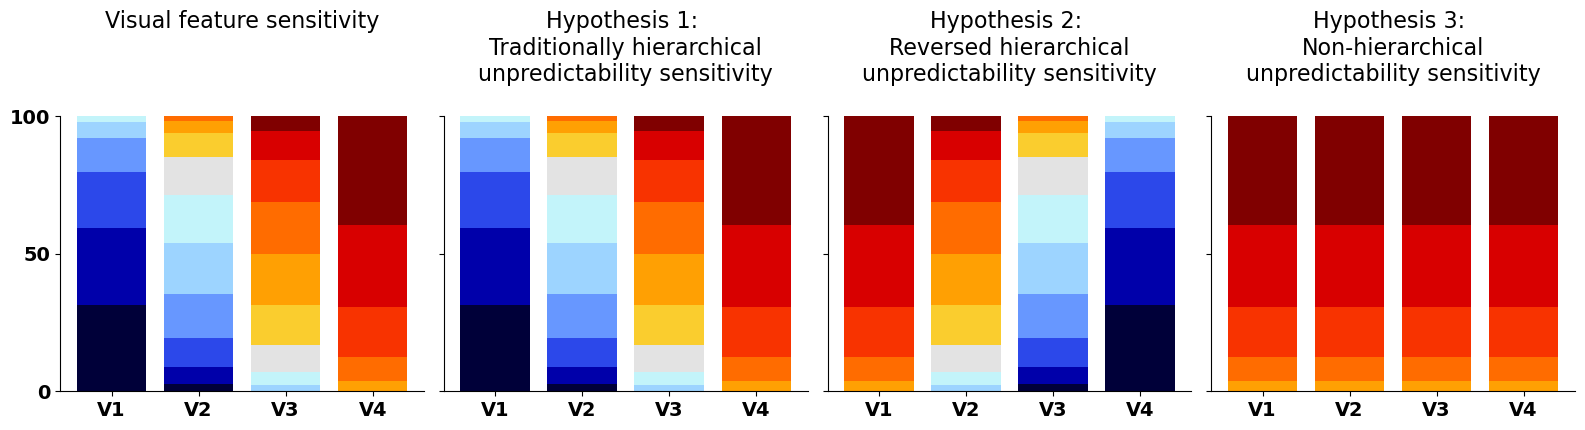

In [8]:
    
hypotheses_plot(n_layers=13,
                bell_width=.0115,
                bell_loc=2.8,
                bell_kurtosis=.004)